In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
df=pd.read_csv("Downloads/ai_job_dataset.csv")
df.head()




,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [9]:
print(df.describe(include='all'))


         job_id                    job_title     salary_usd salary_currency  \
count     15000                        15000   15000.000000           15000   
unique    15000                           20            NaN               3   
top     AI00001  Machine Learning Researcher            NaN             USD   
freq          1                          808            NaN           11957   
mean        NaN                          NaN  115348.965133             NaN   
std         NaN                          NaN   60260.940438             NaN   
min         NaN                          NaN   32519.000000             NaN   
25%         NaN                          NaN   70179.750000             NaN   
50%         NaN                          NaN   99705.000000             NaN   
75%         NaN                          NaN  146408.500000             NaN   
max         NaN                          NaN  399095.000000             NaN   

       experience_level employment_type company_loc

In [13]:
print("Missing values:\n", df.isna().sum())
df = df.dropna(subset=['salary_usd', 'company_location', 'job_title'])


Missing values:
 job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [61]:
df_ai.dtypes


NameError: name 'df_ai' is not defined

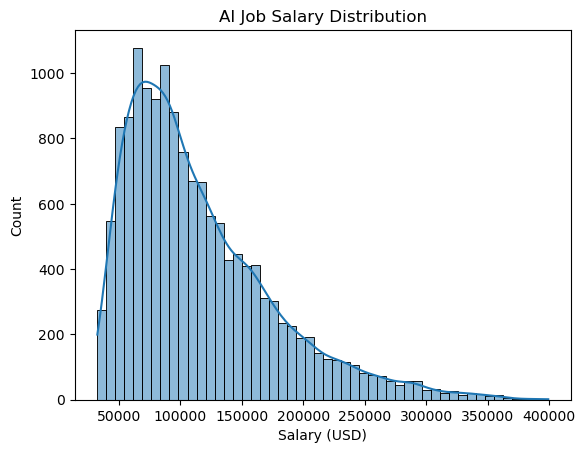

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['salary_usd'], bins=50, kde=True)
plt.title('AI Job Salary Distribution')
plt.xlabel('Salary (USD)')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12428\310331165.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_titles, x='salary_usd', y='job_title', palette='viridis')


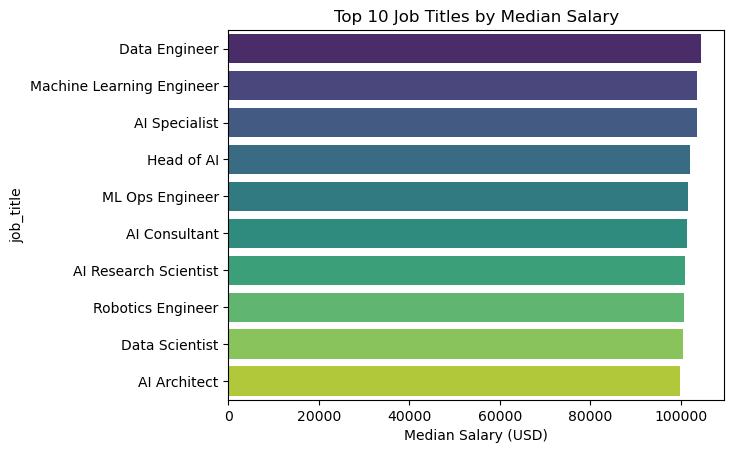

In [19]:
top_titles = (df.groupby('job_title')['salary_usd']
                .median()
                .nlargest(10)
                .reset_index())
sns.barplot(data=top_titles, x='salary_usd', y='job_title', palette='viridis')
plt.title('Top 10 Job Titles by Median Salary')
plt.xlabel('Median Salary (USD)')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12428\396633194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='job_count', y='country', palette='plasma')


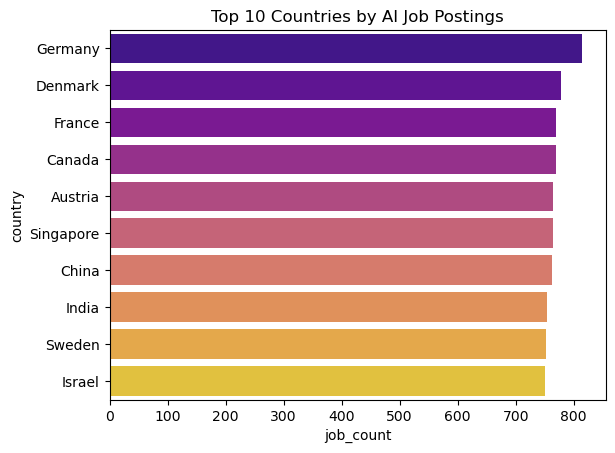

In [21]:
top_countries = (df['company_location']
                  .value_counts()
                  .nlargest(10)
                  .reset_index())
top_countries.columns = ['country', 'job_count']
sns.barplot(data=top_countries, x='job_count', y='country', palette='plasma')
plt.title('Top 10 Countries by AI Job Postings')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12428\2652736521.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_salary, x='salary_usd', y='company_location', palette='magma')


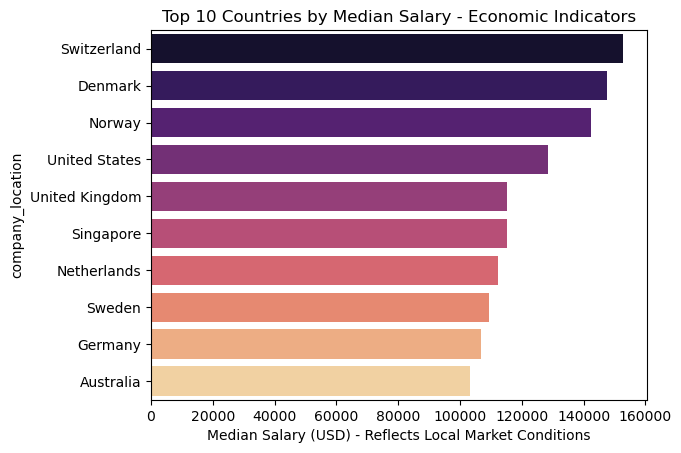

In [59]:
# Group data by company location and calculate median salary for each country
country_salary = (df.groupby('company_location')['salary_usd']
                   .median()  # Calculate median salary
                   .nlargest(10)  # Get top 10 countries with highest median salaries
                   .reset_index())  # Convert Series to DataFrame for plotting

# Create horizontal bar plot showing top 10 countries by median salary
# This visualization helps identify countries with highest compensation packages,
# often reflecting cost of living, market demand for data skills, and economic development
sns.barplot(data=country_salary, x='salary_usd', y='company_location', palette='magma')
plt.title('Top 10 Countries by Median Salary - Economic Indicators')
plt.xlabel('Median Salary (USD) - Reflects Local Market Conditions')
plt.show()

# Note: Higher salaries typically correlate with:
# 1. Higher cost of living in these regions
# 2. Greater competition for data talent
# 3. More developed tech ecosystems and higher GDP per capita
# 4. Potentially different taxation systems affecting gross compensation


C:\Users\USER\AppData\Local\Temp\ipykernel_12428\2614133475.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['salary_usd'].resample('M').mean()


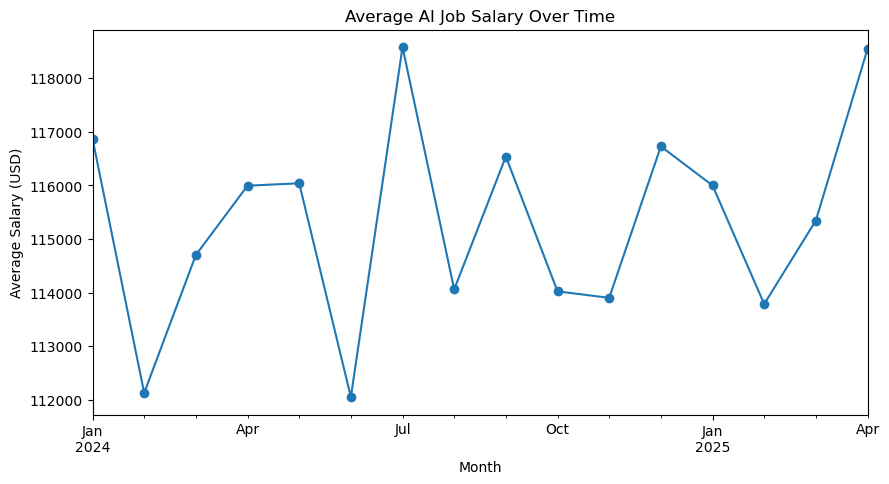

In [29]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df.set_index('posting_date', inplace=True)
monthly = df['salary_usd'].resample('M').mean()

plt.figure(figsize=(10, 5))
monthly.plot(marker='o')
plt.title('Average AI Job Salary Over Time')
plt.xlabel('Month')
plt.ylabel('Average Salary (USD)')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

# Select features
feat = df[['job_title', 'company_location', 'remote_ratio']]
X = feat
y = df['salary_usd']

# One-hot encoding + model pipeline
model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))


MAE: 44266.404768287095


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

vect = CountVectorizer(max_features=50, stop_words='english')
X_skills = vect.fit_transform(df['required_skills' ].fillna(''))

reg = LinearRegression()
reg.fit(X_skills, df['salary_usd'])
coef = pd.Series(reg.coef_, index=vect.get_feature_names_out())
top_skills = coef.abs().nlargest(10).index.tolist()
print("Top salary-influencing skills:", top_skills)


Top salary-influencing skills: ['tableau', 'aws', 'sql', 'python', 'statistics', 'scala', 'linux', 'spark', 'docker', 'git']


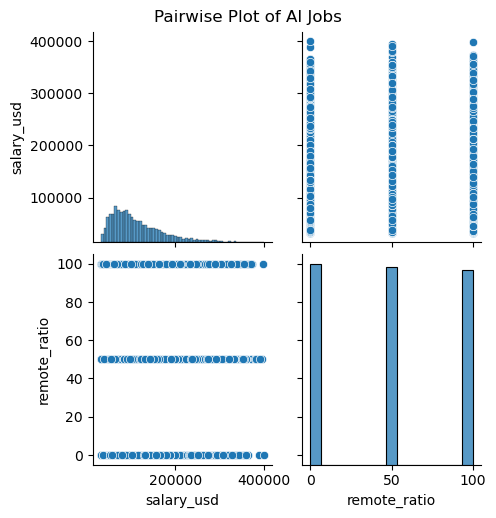

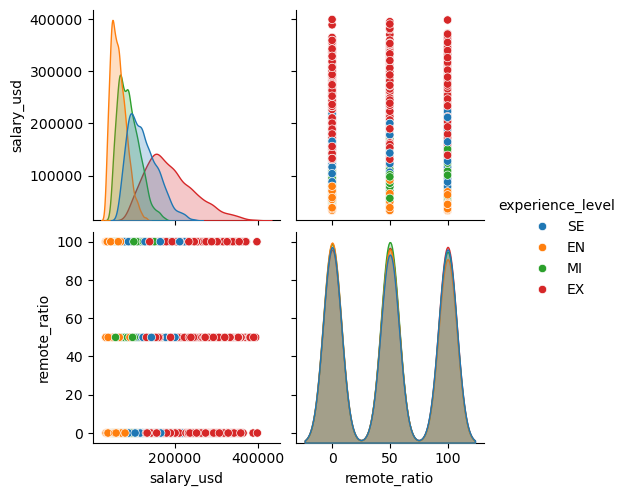

In [45]:
numeric_cols = df[['salary_usd', 'remote_ratio']]
sns.pairplot(numeric_cols)
plt.suptitle("Pairwise Plot of AI Jobs", y=1.02)
sns.pairplot(df, vars=['salary_usd', 'remote_ratio'], hue='experience_level')
plt.show()

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12428\3589264375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='job_title', y='salary_usd', palette='coolwarm')


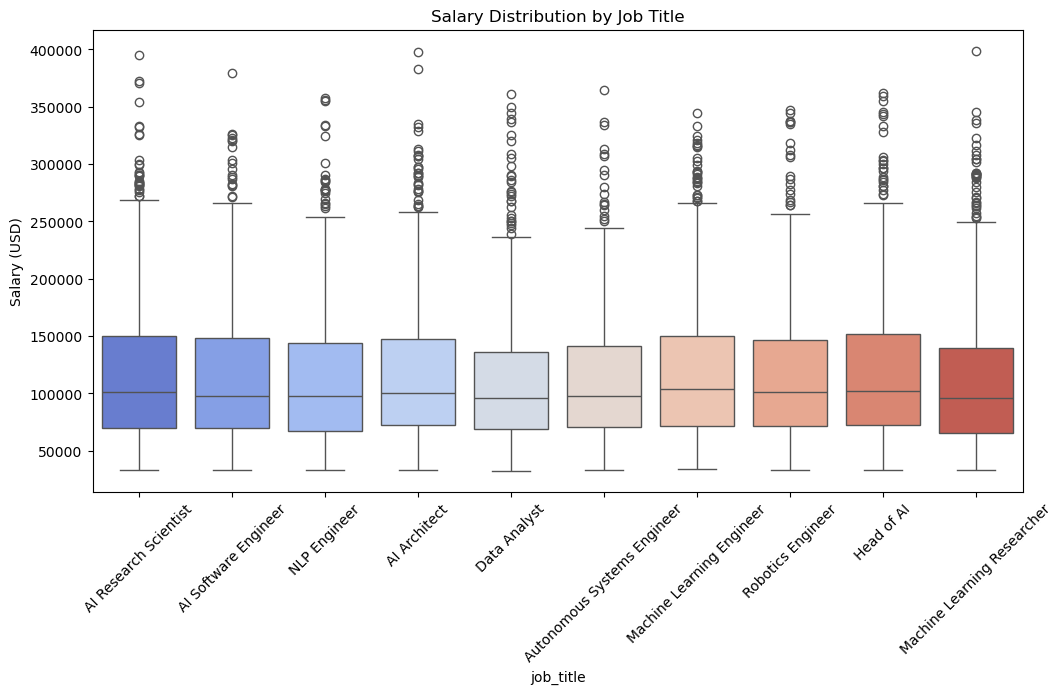

In [51]:
top_titles = df['job_title'].value_counts().nlargest(10).index
subset = df[df['job_title'].isin(top_titles)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='job_title', y='salary_usd', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Title')
plt.ylabel('Salary (USD)')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12428\2017653465.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='Set2')


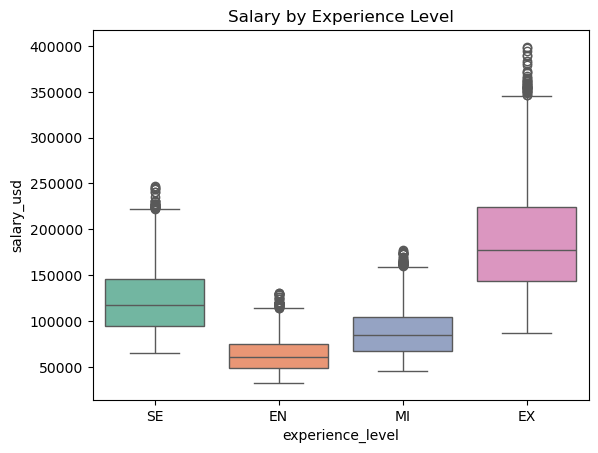

In [53]:
sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='Set2')
plt.title('Salary by Experience Level')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12428\4138300019.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='remote_category', y='salary_usd', palette='Spectral')


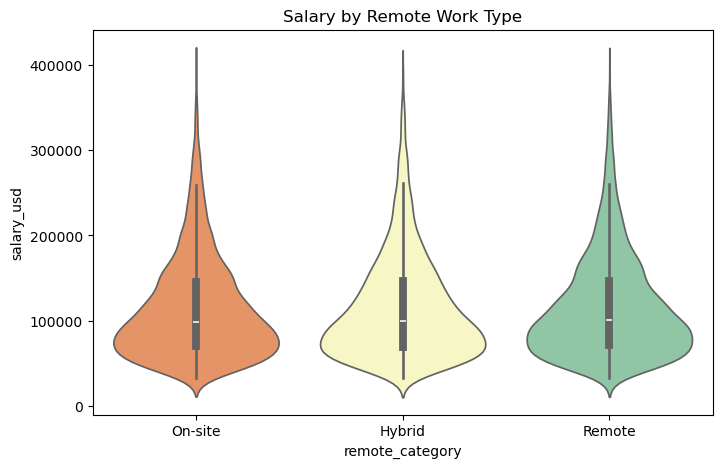

In [55]:
# Categorize remote_ratio into groups
df['remote_category'] = pd.cut(df['remote_ratio'], bins=[-1, 0, 50, 100], labels=['On-site', 'Hybrid', 'Remote'])

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='remote_category', y='salary_usd', palette='Spectral')
plt.title('Salary by Remote Work Type')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12428\135386596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset, x='company_location', y='salary_usd', palette='viridis')


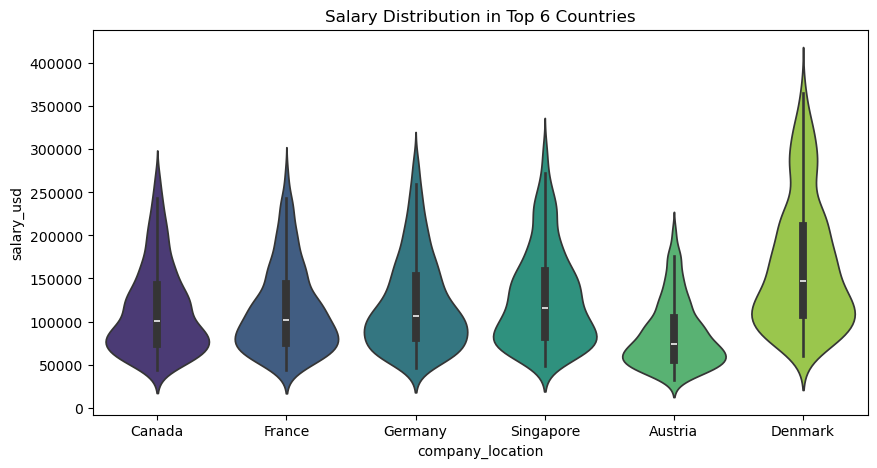

In [57]:
top_countries = df['company_location'].value_counts().nlargest(6).index
subset = df[df['company_location'].isin(top_countries)]

plt.figure(figsize=(10, 5))
sns.violinplot(data=subset, x='company_location', y='salary_usd', palette='viridis')
plt.title('Salary Distribution in Top 6 Countries')
plt.show()
